#**MCMC**

##${f(x)} = {(\frac{{x^{c-1}}}{𝛤(c)b^c})}^{\frac{-x}{b}}$

**Importing libraries**

In [8]:
import numpy as np
import random
import scipy.special as ss
import pylab as pl

In [2]:
def gamma_value(c):
  return ss.gamma(c)

In [3]:
def my_gamma(x,c,b):
  num = x**(c-1)
  gv = gamma_value(c)
  deno = gv*(b)**c
  ex = -1*x/b
  return (num/deno)**ex

In [4]:
def random_coin(p):
    unif = random.uniform(0,1)
    if unif>=p:
        return False 
    else:
        return True

In [5]:
def gamma_mcmc(n,c,b):
  states = []
  cur = random.uniform(0,20)
  for i in range(n):
    states.append(cur)
    next = random.uniform(0,20)
    val = my_gamma(next,c,b)/my_gamma(cur,c,b)
    ap = min(val,1)
    if random_coin(ap):
      cur = next
  return states[-1000:]

In [6]:
def plot_gamma(c,b):
  pl.hist(gamma_mcmc(1000,c,b), density=True,bins =25, histtype='step',label="Simulated_MCMC: b="+str(b)+", c="+str(c))
  pl.show()

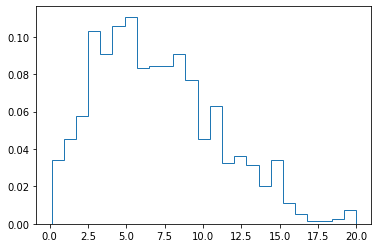

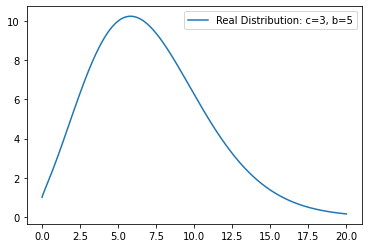

In [9]:
  c = 3
  b = 5
  plot_gamma(c,b)
  Ly = []
  Lx = []
  listt = np.mgrid[0:20:1000j]
  for i in listt:
    Lx.append(i)
    Ly.append(my_gamma(i,c,b))

  pl.plot(Lx, Ly, label="Real Distribution: c="+str(c)+", b="+str(b))
  pl.legend()
  pl.show()

**MCMC function adapted to the last item of this problem**, i decided to create a new one because the original MCMC return a different param than the required here and also there are few validations that one method has and the other does not.

In [10]:
def gamma_mcmc2(n,c,b):
  top = -1
  states = []
  cur = random.uniform(0,20)
  for i in range(n):
    states.append(cur)
    if cur > top:
      top = cur
    next = random.uniform(0,20)
    val = my_gamma(next,c,b)/my_gamma(cur,c,b)
    ap = min(val,1)
    if random_coin(ap):
      cur = next
  return top

In [11]:
n = 100
iterations_inside_MCMC = 1000
sum = 0
for i in range(n):
  sum = sum + gamma_mcmc2(iterations_inside_MCMC, c, b)
print("The average max value of the MCMC is", sum/n)

The average max value of the MCMC is 19.474944919434478


**Conclusion**

Through MCMC method we can approximate the behaviour of some functions without a lot of computational resources. Also this method is really intuitive.